#### Navid Al-Musabbir 1721853042
#### Md. Rubel Rana 1712661642

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae

### Dataset Import

In [2]:
data = 'dataset/Aus/aus.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,District,Area,Year,Max_Temp,Min_Temp,Rainfall,Humidity,Wind,Cloud,Sunshine,ALT,Productions,PPH
0,41883,286080,1969,33.05,26.15,323.0,87.5,1.35,6.00,4.200,20,95240,0.33291387
1,41978,264775,1969,33.25,24.75,699.5,88.0,4.40,6.50,4.800,6,121470,0.458766878
2,41933,566325,1969,34.15,24.80,601.5,88.5,2.40,4.80,4.900,10,224045,0.39561206
3,41923,499125,1969,33.05,26.00,369.0,87.0,2.00,5.95,5.350,9,185035,0.370718758
4,41863,484460,1969,35.30,26.50,482.5,87.0,0.90,5.25,4.748,37,187185,0.386378648


In [5]:
df.tail()

,District,Area,Year,Max_Temp,Min_Temp,Rainfall,Humidity,Wind,Cloud,Sunshine,ALT,Productions,PPH
763,41895,117246,2013,36.65,26.50,177.5,85.5,2.45,5.70,4.95,20,113956,0.971939341
764,41966,14036,2013,34.75,24.95,237.0,85.0,1.70,5.50,4.35,63,10987,0.78277287
765,41859,0,2013,35.25,26.50,282.0,82.5,2.20,6.75,4.85,34,0,#DIV/0!
766,41891,91034,2013,35.40,25.70,543.5,84.5,3.15,7.25,3.80,35,110837,1.217534108
767,41909,2905,2013,35.65,26.20,172.0,83.5,2.40,5.85,4.30,10,2347,0.807917384


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     768 non-null    int64  
 1   Area         768 non-null    int64  
 2   Year         768 non-null    int64  
 3   Max_Temp     768 non-null    float64
 4   Min_Temp     768 non-null    float64
 5   Rainfall     768 non-null    float64
 6   Humidity     768 non-null    float64
 7   Wind         768 non-null    float64
 8   Cloud        768 non-null    float64
 9   Sunshine     768 non-null    float64
 10  ALT          768 non-null    int64  
 11  Productions  768 non-null    int64  
 12  PPH          768 non-null    object 
dtypes: float64(7), int64(5), object(1)
memory usage: 78.1+ KB


In [7]:
df= df[df['Area'] != 0]
df= df[df['Productions'] != 0]
df['PPH'] = pd.to_numeric(df['PPH'])

In [8]:
#defining response and predictor variables
X = df[['District', 'Area', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT']]
y = df[['PPH']]

### Checking number of principal components and MSE

In [9]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [10]:
#defining cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

In [11]:
for i in np.arange(1, 12):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'Production')

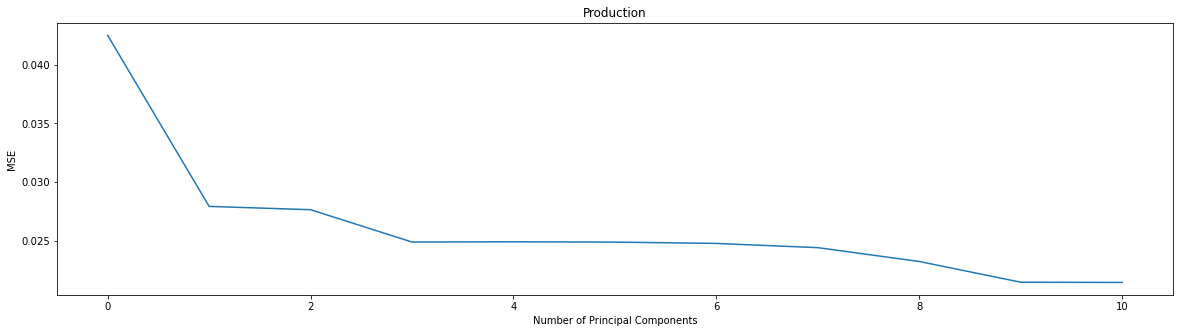

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Production')

In [13]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 24.3 ,  42.46,  57.76,  69.1 ,  76.89,  82.53,  87.36,  91.81,
        95.35,  98.02, 100.  ])

In [14]:
#spliting the dataset
rng = np.random.RandomState(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=rng)

In [15]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

In [16]:
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

LinearRegression()

In [17]:
pred = regr.predict(X_reduced_test)
print("MSE =", np.sqrt(mean_squared_error(y_test, pred)))

MSE = 0.19786813859068036


In [18]:
print("MAE =", mae(y_test, pred))

MAE = 0.15517685146956356


### PCR RMSE, R Squared, MAE Values using 10th component

In [19]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=10), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps['pca']

In [20]:
#calculating RMSE
pcr.fit(scale(X_train), y_train)

print("RMSE =", np.sqrt(mean_squared_error(y_test, pcr.predict(scale(X_test)))))

RMSE = 0.13756902526014025


In [21]:
#calculating R2
pcr.fit(X_train, y_train)

print("R2 =", pcr.score(X_test, y_test))

R2 = 0.5234297416423943


In [22]:
#calculating MAE
pcr.fit(scale(X_train), y_train)

print("MAE =", mae(y_test, pcr.predict(scale(X_test))))

MAE = 0.1042066832523748


### Plot

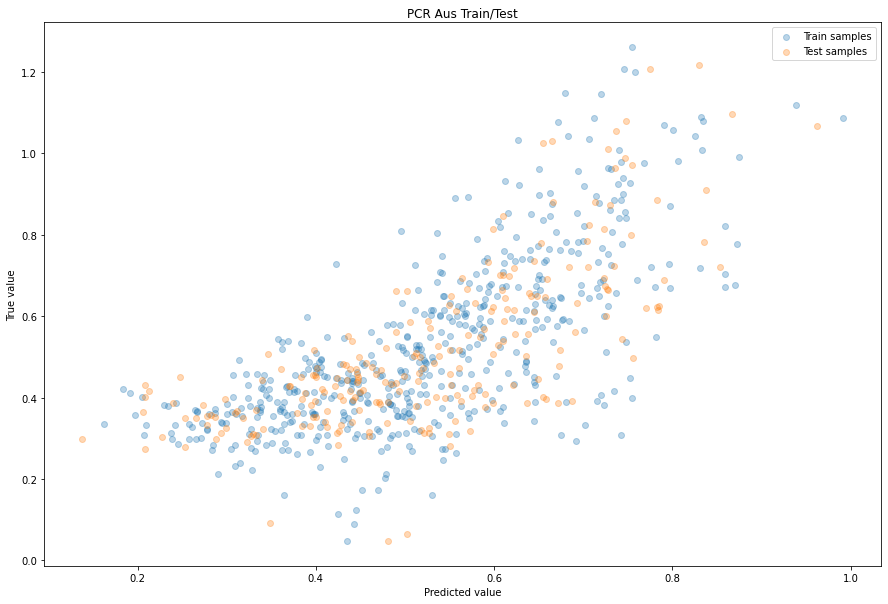

In [23]:
plt.figure(figsize=(15,10))
plt.scatter(pcr.predict(scale(X_train)), y_train, alpha=.3, label="Train samples")
plt.scatter(pcr.predict(scale(X_test)), y_test, alpha=.3, label="Test samples")
plt.title('PCR Aus Train/Test')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.savefig("figures/pcr_aus.png")
plt.show()

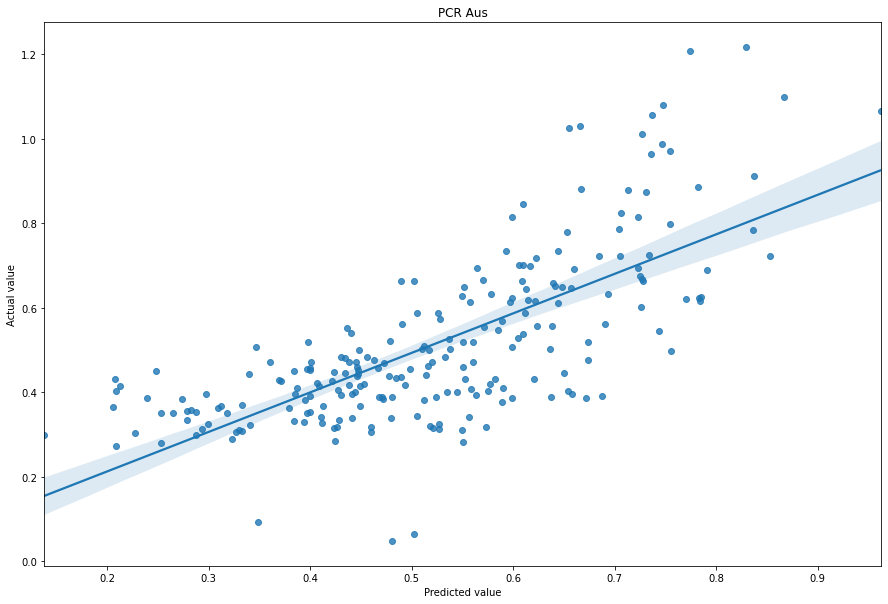

In [24]:
plt.figure(figsize=(15,10))
sns.regplot(x=pcr.predict(scale(X_test)), y = y_test, data = df)
plt.title('PCR Aus')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("figures/pcr_aus_2.png")

### Checking number of principal components and MSE

In [25]:
#defining cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
mse = []
n = len(X)

In [26]:
for i in np.arange(1, 12):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'Production')

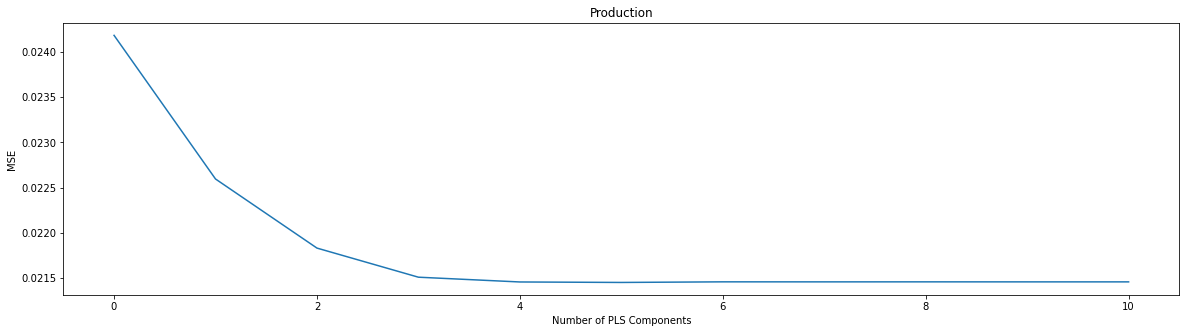

In [27]:
plt.figure(figsize=(20, 5))
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('Production')

### PLSR RMSE, R Squared, MAE Values Using 4th Component

In [28]:
#calculating RMSE
pls = PLSRegression(n_components=4)
pls.fit(scale(X_train), y_train)

print("RMSE =", np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test)))))

RMSE = 0.13765390791638527


In [29]:
#calculating R2
pls = PLSRegression(n_components=4)
pls.fit((X_train), y_train)

print("R2 =", pls.score(X_test, y_test))

R2 = 0.5234020990536842


In [30]:
#calculating MAE
pls = PLSRegression(n_components=4)
pls.fit(scale(X_train), y_train)

print("MAE =", mae(y_test, pls.predict(scale(X_test))))

MAE = 0.10406513146221895


### Plot

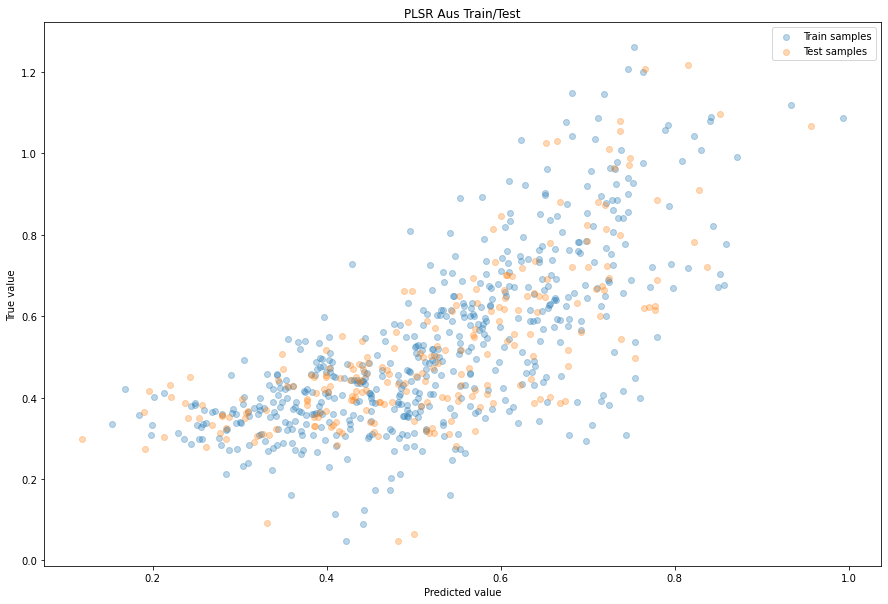

In [31]:
pls = PLSRegression(n_components=4)
pls.fit(X_train, y_train)

plt.figure(figsize=(15,10)) 
plt.scatter(pls.predict(X_train), y_train, alpha=.3, label="Train samples") 
plt.scatter(pls.predict(X_test), y_test, alpha=.3, label="Test samples")
plt.title('PLSR Aus Train/Test')
plt.xlabel("Predicted value") 
plt.ylabel("True value") 
plt.legend()
plt.savefig("figures/plsr_aus.png")
plt.show()

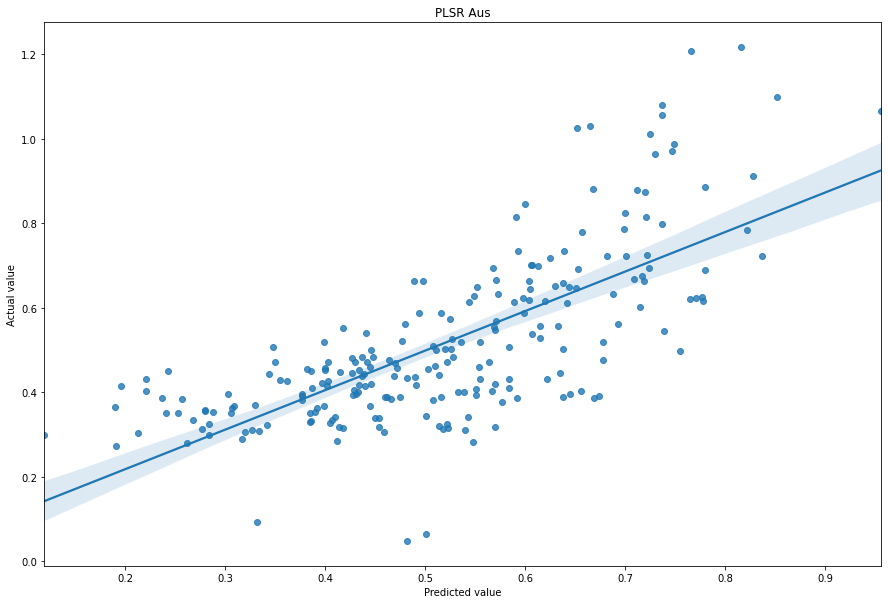

In [32]:
plt.figure(figsize=(15,10))
sns.regplot(x=pls.predict(X_test), y = y_test, data = df)
plt.title('PLSR Aus')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("figures/plsr_aus_2.png")